# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#take a look at a sample response for reference

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
    
response = requests.get(city_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {
        "lat": 20.8947,
        "lon": -156.47
    },
    "dt": 1674413774,
    "id": 5847411,
    "main": {
        "feels_like": 298.8,
        "humidity": 84,
        "pressure": 1017,
        "temp": 298.06,
        "temp_max": 298.06,
        "temp_min": 295.35
    },
    "name": "Kahului",
    "sys": {
        "country": "US",
        "id": 19170,
        "sunrise": 1674407089,
        "sunset": 1674446986,
        "type": 2
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 28,
        "gust": 7.6,
        "speed": 7.15
    }
}


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alta floresta
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | acapulco
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | lokosovo
Processing Record 10 of Set 1 | salamanca
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | cap malheureux
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | pryozerne
Processing Record 20 of Set 1 | evensk
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | redmond


Processing Record 39 of Set 4 | loukhi
Processing Record 40 of Set 4 | zemio
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | mizdah
Processing Record 43 of Set 4 | volksrust
Processing Record 44 of Set 4 | yuncheng
Processing Record 45 of Set 4 | lolua
City not found. Skipping...
Processing Record 46 of Set 4 | tynda
Processing Record 47 of Set 4 | mollendo
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | bathsheba
Processing Record 0 of Set 5 | hailey
Processing Record 1 of Set 5 | fort nelson
Processing Record 2 of Set 5 | lugovoy
Processing Record 3 of Set 5 | seoul
Processing Record 4 of Set 5 | tidore
City not found. Skipping...
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | general roca
Processing Record 7 of Set 5 | kaeo
Processing Record 8 of Set 5 | torbay
Processing Record 9 of Set 5 | opuwo
Processing Record 10 of Set 5 | vardo
Processing Record 11 of Set 5 | chuy
Processing Record 12 of Set 5 | birnin k

Processing Record 26 of Set 8 | qeshm
Processing Record 27 of Set 8 | lewiston
Processing Record 28 of Set 8 | paddhari
Processing Record 29 of Set 8 | havelock
Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | finnsnes
Processing Record 32 of Set 8 | kuche
City not found. Skipping...
Processing Record 33 of Set 8 | qandala
Processing Record 34 of Set 8 | muncar
Processing Record 35 of Set 8 | meulaboh
Processing Record 36 of Set 8 | ballina
Processing Record 37 of Set 8 | stornoway
Processing Record 38 of Set 8 | chuzhou
Processing Record 39 of Set 8 | algete
Processing Record 40 of Set 8 | vieux-habitants
Processing Record 41 of Set 8 | salekhard
Processing Record 42 of Set 8 | jiayuguan
Processing Record 43 of Set 8 | salmas
Processing Record 44 of Set 8 | fortuna
Processing Record 45 of Set 8 | huilong
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | itarema
Processing Record 49 of Set 8 | 

Processing Record 15 of Set 12 | buariki
City not found. Skipping...
Processing Record 16 of Set 12 | santa luzia
Processing Record 17 of Set 12 | baryatino
Processing Record 18 of Set 12 | clyde
Processing Record 19 of Set 12 | skagastrond
City not found. Skipping...
Processing Record 20 of Set 12 | erzurum
Processing Record 21 of Set 12 | chiredzi
Processing Record 22 of Set 12 | lufilufi
Processing Record 23 of Set 12 | hebertville
City not found. Skipping...
Processing Record 24 of Set 12 | sao miguel do oeste
City not found. Skipping...
Processing Record 25 of Set 12 | tuatapere
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | zhengjiatun
Processing Record 28 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 29 of Set 12 | khandyga
Processing Record 30 of Set 12 | pingliang
Processing Record 31 of Set 12 | cuautepec
Processing Record 32 of Set 12 | arlit
Processing Record 33 of Set 12 | bafq
Processing Record 34 of Set 12 | san andres
Process

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alta floresta,-9.8756,-56.0861,300.42,75,77,0.75,BR,1674413775
1,port alfred,-33.5906,26.8910,294.36,95,100,0.90,ZA,1674413775
2,tautira,-17.7333,-149.1500,299.59,73,100,4.79,PF,1674413776
3,talnakh,69.4865,88.3972,249.61,81,98,2.11,RU,1674413776
4,mataura,-46.1927,168.8643,283.20,66,71,1.18,NZ,1674413777


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alta floresta,-9.8756,-56.0861,300.42,75,77,0.75,BR,1674413775
1,port alfred,-33.5906,26.8910,294.36,95,100,0.90,ZA,1674413775
2,tautira,-17.7333,-149.1500,299.59,73,100,4.79,PF,1674413776
3,talnakh,69.4865,88.3972,249.61,81,98,2.11,RU,1674413776
4,mataura,-46.1927,168.8643,283.20,66,71,1.18,NZ,1674413777


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

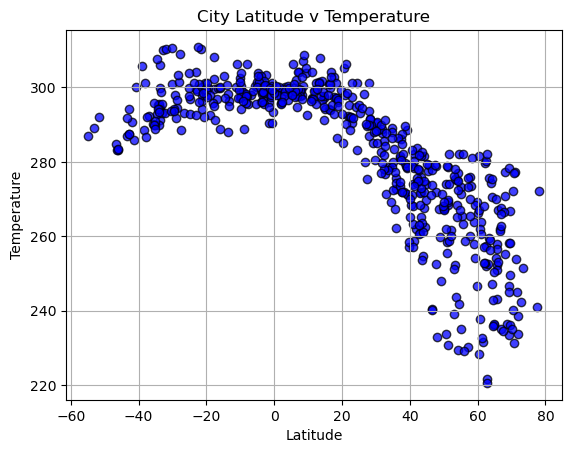

In [18]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(x_axis,temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

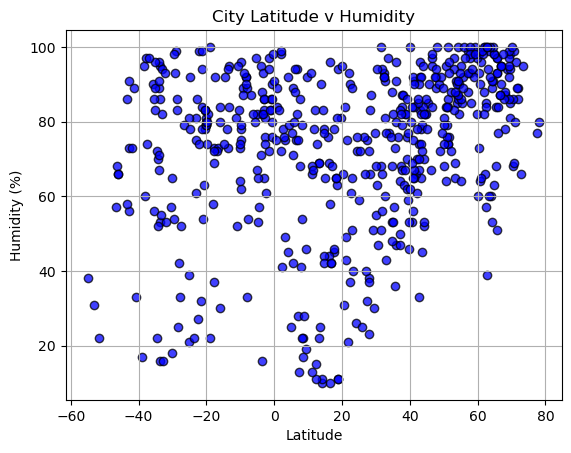

In [19]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
humid = city_data_df["Humidity"]

plt.scatter(x_axis,humid, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

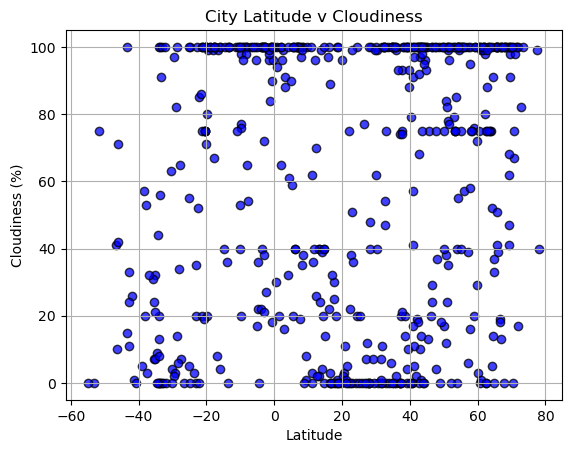

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

plt.scatter(x_axis,clouds, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

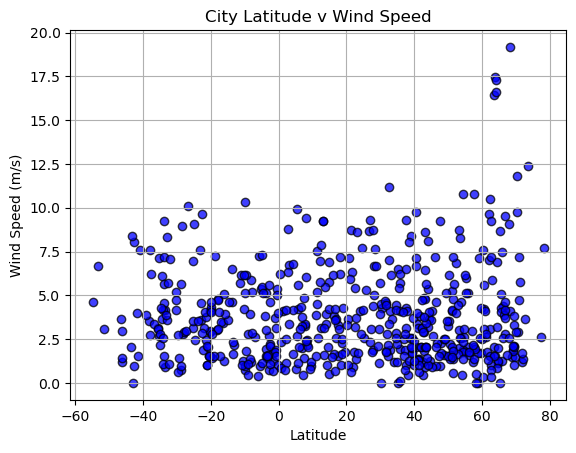

In [21]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
windy = city_data_df["Wind Speed"]

plt.scatter(x_axis,windy, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude v Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots

def create_lr(x, y, title, xlabel, ylabel, filename):

    reg_slope, reg_int, reg_r, reg_p, reg_std_err = linregress(x, y)
    reg_fit = reg_slope * x + reg_int

    line = "y = " + str(round(reg_slope,2)) + "x + " + str(round(reg_int,2))

    print(f"The r value is {round(reg_r,2)}")

    plt.scatter(x,y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
    plt.plot(x, reg_fit, color = "red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.annotate(line,(5.8,0.8),fontsize=15,color="red")


    # Save the figure
    plt.savefig(f"../output_data/{filename}.png")

    # # Show plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,talnakh,69.4865,88.3972,249.61,81,98,2.11,RU,1674413776
5,albany,42.6001,-73.9662,274.79,74,100,0.45,US,1674413729
6,acapulco,16.8634,-99.8901,304.05,42,0,2.57,MX,1674413612
8,lokosovo,61.1333,74.8167,263.95,96,99,2.60,RU,1674413778
9,salamanca,40.8333,-6.0000,274.03,56,91,3.36,ES,1674413778


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alta floresta,-9.8756,-56.0861,300.42,75,77,0.75,BR,1674413775
1,port alfred,-33.5906,26.8910,294.36,95,100,0.90,ZA,1674413775
2,tautira,-17.7333,-149.1500,299.59,73,100,4.79,PF,1674413776
4,mataura,-46.1927,168.8643,283.20,66,71,1.18,NZ,1674413777
7,hermanus,-34.4187,19.2345,295.26,70,44,6.10,ZA,1674413655


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.83


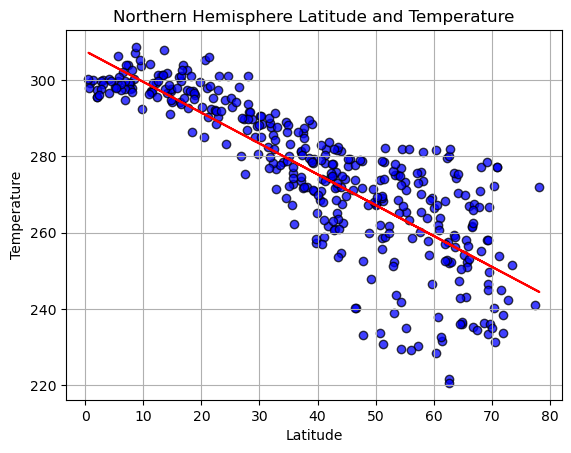

In [33]:
# Linear regression on Northern Hemisphere

create_lr(x = northern_hemi_df["Lat"], 
          y = northern_hemi_df["Max Temp"], 
          title = "Northern Hemisphere Latitude and Temperature", 
          xlabel = "Latitude", 
          ylabel = "Temperature", 
          filename = "fig5"
         )

The r value is 0.4


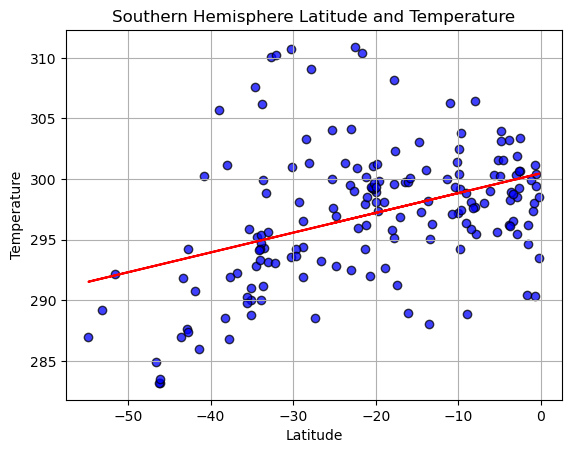

In [34]:
# Linear regression on Southern Hemisphere

create_lr(x = southern_hemi_df["Lat"], 
          y = southern_hemi_df["Max Temp"], 
          title = "Southern Hemisphere Latitude and Temperature", 
          xlabel = "Latitude", 
          ylabel = "Temperature", 
          filename = "fig6"
         )

**Discussion about the linear relationship:** 

There is a strong negative correlation between latitude and temperature in the northern hemisphere. The further north you go, the lower the temperature. In the southern hemisphere, we see a weak positive correlation. This indicates that as we go north in the southern hemisphere the temperature rises. In both hemispheres, the temperature is higher the nearer you are to the equator.


### Humidity vs. Latitude Linear Regression Plot

The r value is 0.48


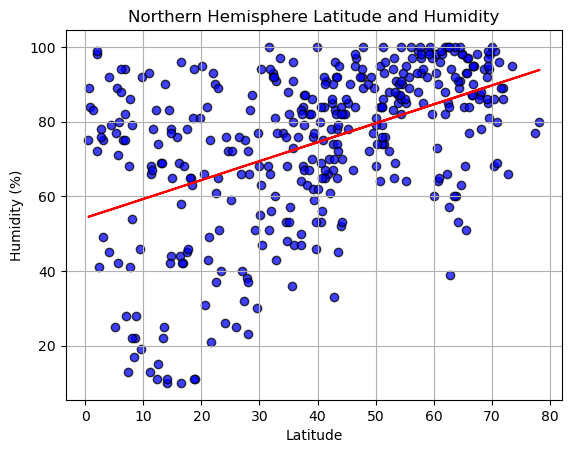

In [27]:
# Northern Hemisphere

create_lr(x = northern_hemi_df["Lat"], 
          y = northern_hemi_df["Humidity"], 
          title = "Northern Hemisphere Latitude and Humidity", 
          xlabel = "Latitude", 
          ylabel = "Humidity (%)", 
          filename = "fig7"
         )

The r value is 0.27


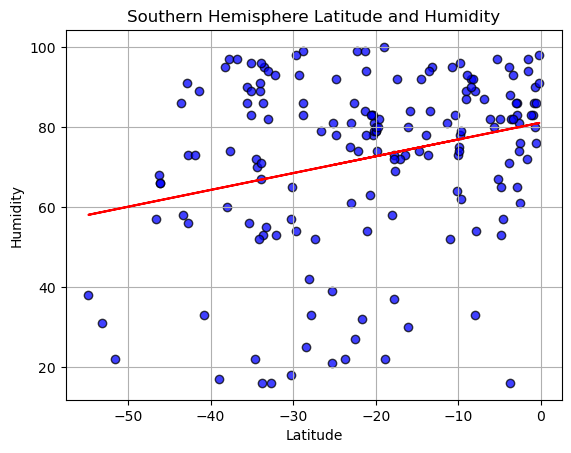

In [28]:
# Southern Hemisphere

create_lr(x = southern_hemi_df["Lat"], 
          y = southern_hemi_df["Humidity"], 
          title = "Southern Hemisphere Latitude and Humidity", 
          xlabel = "Latitude", 
          ylabel = "Humidity", 
          filename = "fig8"
         )

**Discussion about the linear relationship:** 

The northern hemisphere has a pretty strong positive correlation between latitude and humidity. As we go north in the northern hemisphere, we can expect higher values for humidity. 

The southern hemisphere also has a positive correlation between latitude and humidity, but it is weaker. It's not necessarily more humid the further north you go in the southern hemisphere. This makes sense when we consider that some of the places in the north of the southern hemisphere are in the Sahara desert, for example. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.21


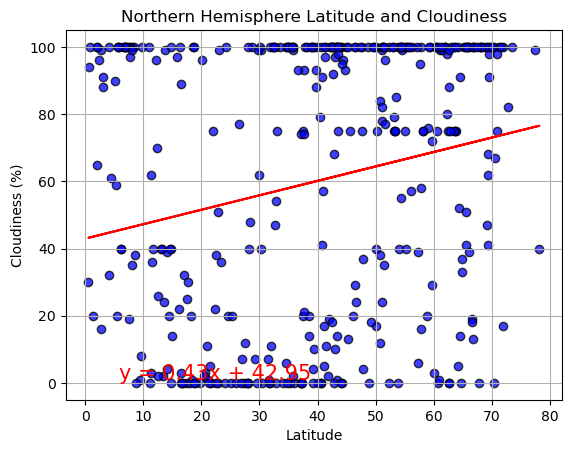

In [35]:
# Northern Hemisphere

create_lr(x = northern_hemi_df["Lat"], 
          y = northern_hemi_df["Cloudiness"], 
          title = "Northern Hemisphere Latitude and Cloudiness", 
          xlabel = "Latitude", 
          ylabel = "Cloudiness (%)", 
          filename = "fig9"
         )

The r value is 0.5


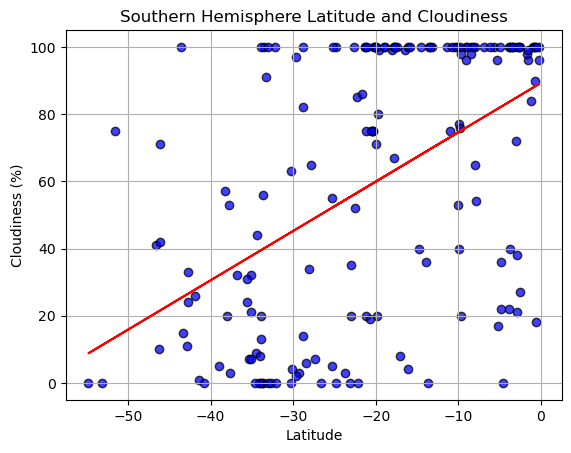

In [36]:
# Southern Hemisphere

create_lr(x = southern_hemi_df["Lat"], 
          y = southern_hemi_df["Cloudiness"], 
          title = "Southern Hemisphere Latitude and Cloudiness", 
          xlabel = "Latitude", 
          ylabel = "Cloudiness (%)", 
          filename = "fig10"
         )

**Discussion about the linear relationship:** 

The north hemisphere shows a weak positive correlation between latitude and cloudiness, while the southern hemisphere has a pretty strong positive correlation. 

In the northern hemisphere, we can't really base our expectation of cloudiness on the latitude. But, if we are just south of the equator (the north of the southern hemisphere), we can expect clouds. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.06


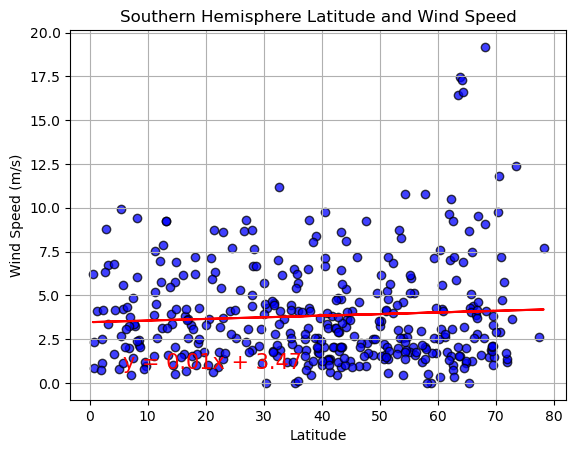

In [38]:
# Northern Hemisphere

create_lr(x = northern_hemi_df["Lat"], 
          y = northern_hemi_df["Wind Speed"], 
          title = "Southern Hemisphere Latitude and Wind Speed", 
          xlabel = "Latitude", 
          ylabel = "Wind Speed (m/s)", 
          filename = "fig11"
         )

The r value is -0.17


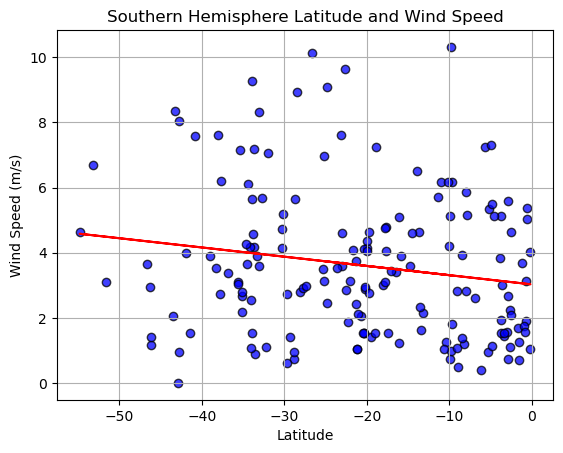

In [39]:
# Southern Hemisphere

create_lr(x = southern_hemi_df["Lat"], 
          y = southern_hemi_df["Wind Speed"], 
          title = "Southern Hemisphere Latitude and Wind Speed", 
          xlabel = "Latitude", 
          ylabel = "Wind Speed (m/s)", 
          filename = "fig12"
         )

**Discussion about the linear relationship:** 

There's a very weak correlation between latitude and wind speed in both hemispheres. In the northern hemisphere it is positive and the southern hemisphere it is negative. The correlation is so weak that have to accept it might be windy wherever we go. 